# Analýza hlavních komponent

## Úkol

- V datasetu Portland Housing Prices/Sales Jul 2020 - Jul 2021 zjistěte, jestli je zde problém multikolinearity.
- Proveďte analyzu hlavních komponent
- Vytvořte lineární model z PCA a model porovnejte s minulým cvičením

# Načtení dat

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv ("..\dataset\portland_filtered.csv",  sep=';')

# Analýza
- zobrazte data
- vyřešte NaN hodnoty
- zobrazte základní statistiky dat
- zobrazte korelační matici

In [6]:
print(data)

    bathrooms  bedrooms  livingArea  age    price
0           3         5        3470    7  1165000
1           4         5        3374   85  1050000
2           3         3        3265   20   442500
3           3         3        3192   36   765000
4           3         4        3157   73   815000
..        ...       ...         ...  ...      ...
95          1         3         838   72   250000
96          1         2         832   47   260000
97          1         2         812   46   220000
98          1         2         810   97   546500
99          1         1         766   83   370000

[100 rows x 5 columns]


In [4]:
print(data.describe());

        bathrooms    bedrooms   livingArea        age         price
count  100.000000  100.000000   100.000000  100.00000  1.000000e+02
mean     2.380000    3.260000  1974.080000   49.88000  5.196074e+05
std      0.838228    0.860115   663.629851   32.77973  1.722241e+05
min      1.000000    1.000000   766.000000    3.00000  1.650000e+05
25%      2.000000    3.000000  1530.000000   20.00000  4.125000e+05
50%      2.000000    3.000000  1859.000000   47.50000  5.000000e+05
75%      3.000000    4.000000  2490.250000   75.25000  5.995312e+05
max      5.000000    6.000000  3470.000000  114.00000  1.165000e+06


In [5]:
data=data.dropna()

<Axes: >

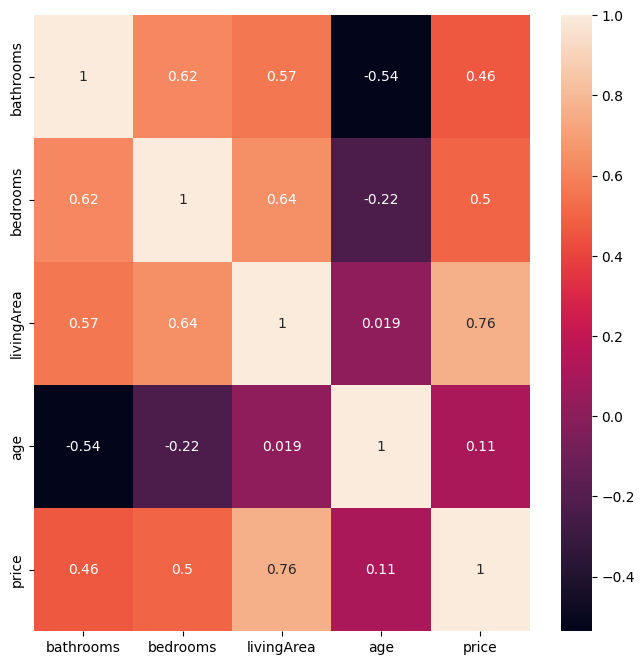

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.heatmap(data.corr(),annot=True)

# Příprava dat
- vyberte X promenné bathrooms', 'bedrooms', 'livingArea','age','price'
- proměnné standardizujte

In [12]:
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

In [13]:
data_std = pd.DataFrame(columns=data.columns)
for i in data.columns:
    data_std[i] = rescale(data[i])

In [14]:
data_std.describe()

,bathrooms,bedrooms,livingArea,age,price
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,1.199041e-16,2.087219e-16,1.110223e-16,-6.217249e-17,9.436896e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.646330e+00,-2.627555e+00,-1.820412e+00,-1.430152e+00,-2.058988e+00
25%,-4.533373e-01,-3.022851e-01,-6.691682e-01,-9.115389e-01,-6.219070e-01
50%,-4.533373e-01,-3.022851e-01,-1.734099e-01,-7.260584e-02,-1.138480e-01
75%,7.396555e-01,8.603500e-01,7.777980e-01,7.739539e-01,4.640692e-01
max,3.125641e+00,3.185620e+00,2.254148e+00,1.956087e+00,3.747400e+00


# Zobrazte VIF pro každou proměnnou

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [21]:
# Výpočet VIF pro každou proměnnou
vifdf = []
for i in data.columns:
    X = np.array(data.drop(i,axis=1))
    y = np.array(data[i])
    lr = LinearRegression()
    lr.fit(X,y)
    y_pred = lr.predict(X)
    r2 = r2_score(y,y_pred)
    vif = 1/(1-r2)
    vifdf.append((i,vif))

vifdf = pd.DataFrame(vifdf,columns=['Features','Variance Inflation Factor'])
vifdf.sort_values(by='Variance Inflation Factor')


,Features,Variance Inflation Factor
3,age,1.930008
1,bedrooms,2.037278
4,price,2.550418
0,bathrooms,2.989507
2,livingArea,3.280001


# PCA
- Proveďte PCA
- zobrazte korelační matici

In [22]:
from sklearn.decomposition import PCA

In [23]:
# Počet PCA komponent bude 13 stejně jako vstupních parametrů, výstupní MEDV odstraníme
pca = PCA(n_components=4)
X = data_std.drop('price',axis=1)
X_pca = pca.fit_transform(X)

In [24]:
data_std_pca = pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3','PCA4'])
data_std_pca['price'] = data_std['price']

<Axes: >

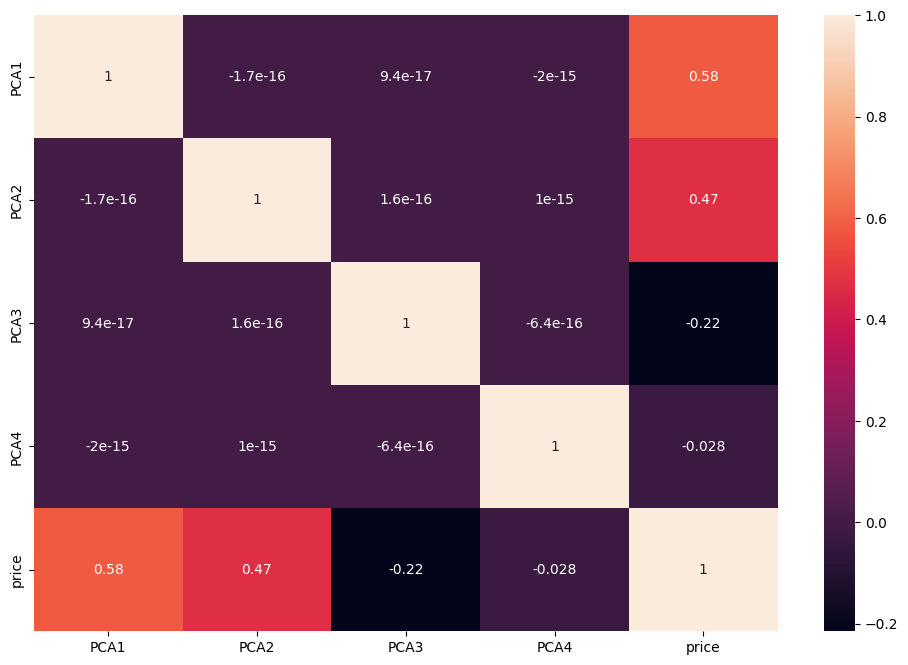

In [25]:
# korelační matice
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sns.heatmap(data_std_pca.corr(),annot=True)

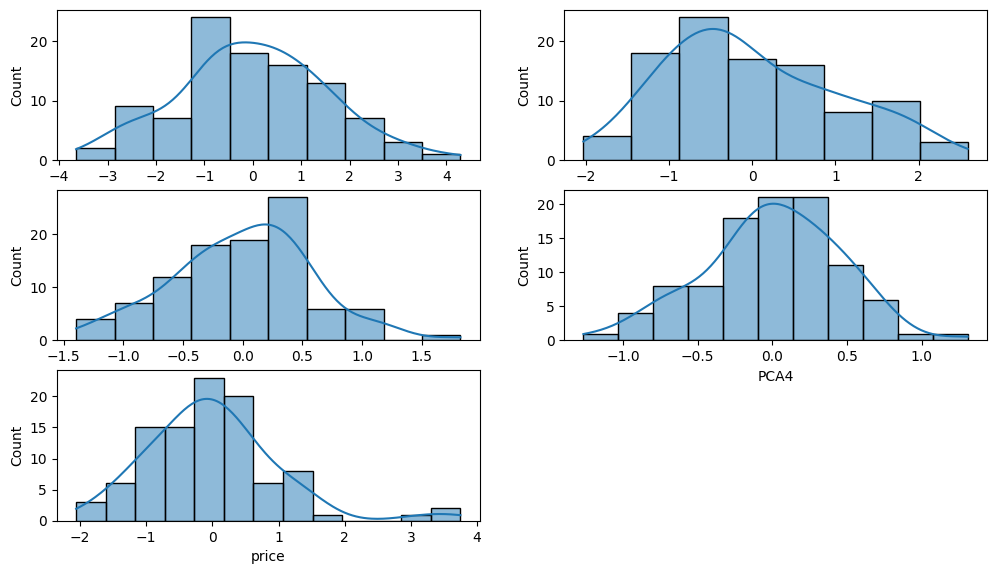

In [26]:
pos = 1
fig = plt.figure(figsize=(12,16))
for i in data_std_pca.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data_std_pca[i],ax=ax, kde=True)

# Lineární model
- Vytvořte a natrénujte Lineární model pro PCA proměnné
- Zobrazte R2 a RMSE

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# rozdělení dat na trénovací a testovací
X = np.array(data_std_pca.drop('price',axis=1))
Y = np.array(data_std_pca['price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
# vytvoření lineárního modelu
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [32]:
from sklearn.metrics import mean_squared_error


In [33]:
# Posouzení modelu pro trénovací data
Y_pred = lr.predict(X_train)
r2 = r2_score(Y_train, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.5686149135547363
RMSE: 0.6240281577969755


In [34]:
Y_pred = lr.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.6847030489656791
RMSE: 0.6474405989977108
